# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [8]:
# Add your imports here
# Importing pandas and numpy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [9]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [4]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [5]:
# Write your code here
colors = pd.read_csv(LEGO_DATA_FOLDER + "/colors.csv.zip")
inventories = pd.read_csv(LEGO_DATA_FOLDER + "/inventories.csv.zip")
inventory_parts = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_parts.csv.zip")
inventory_sets = pd.read_csv(LEGO_DATA_FOLDER + "/inventory_sets.csv.zip")
part_categories = pd.read_csv(LEGO_DATA_FOLDER + "/part_categories.csv.zip")
parts = pd.read_csv(LEGO_DATA_FOLDER + "/parts.csv.zip")
sets = pd.read_csv(LEGO_DATA_FOLDER + "/sets.csv.zip")
themes = pd.read_csv(LEGO_DATA_FOLDER + "/themes.csv.zip")

In [6]:
df = inventory_parts.set_index('inventory_id').join(inventory_sets.set_index("inventory_id"), how="inner", on="inventory_id", lsuffix="_inventories", rsuffix="_parts")
df.shape

(432, 6)

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [7]:
def cleanCheck(data):
    # Check whether any set has an undefined year
    is_nan = data.isna().sum() 

    # Take out the data that is incorrect
    is_bad = data.apply(lambda x: len(x) != 4).sum()
    
    print(is_nan)
    print(is_bad)
    
    

In [8]:
# Write your code here

# Cleaning sets.year 

# Count number of inconsistencies in the set
sets_bad = sets[sets['year'].apply(lambda x: len(x) != 4)]
print(sets_bad.year.count())

# Make all negative years positive
sets['year'] = sets['year'].apply(lambda x: x[1:] if x[0] == "-" else x)

# Delete last number in years with 5 digits
sets['year'] = sets['year'].apply(lambda x: x[:-1] if len(x) == 5 else x)

# Change 70s to nan
sets['year'] = sets['year'].apply(lambda x: np.nan if len(x) == 3 else x)

clean_sets = sets.dropna(axis = 0, subset=['year'])
cleanCheck(clean_sets.year)




3085
0
0


In [10]:
clean_sets['year'].replace(pd.to_datetime(clean_sets.year).dt.year)


1        1978
2        1987
3        1979
4        1979
5        1979
6        1979
7        1978
8        1976
9        1976
10       1976
11       1965
12       1985
13       1976
14       1965
15       1968
16       1968
17       1968
18       1999
19       1968
20       1968
21       1968
22       1968
23       1967
24       1969
25       2001
26       2001
27       2001
28       2001
29       2001
30       2001
         ... 
11643    2014
11644    1991
11645    2012
11646    2012
11647    2013
11648    1995
11649    2003
11650    2000
11651    2000
11652    1995
11653    1998
11654    2000
11655    1985
11656    2001
11657    2000
11658    2000
11659    1997
11660    2006
11661    1997
11662    2000
11663    2003
11664    1959
11665    2006
11666    2009
11667    2013
11668    2012
11669    2015
11670    2010
11671    2013
11672    1996
Name: year, Length: 11559, dtype: object

In [11]:
# Calculate time range
start_year = clean_sets.year.min()
end_year = clean_sets.year.max()
time_range = int(clean_sets.year.max()) - int(clean_sets.year.min())
print('The time range is ' + str(time_range) + " years, between " + str(start_year) + " and " + str(end_year) + ".")

The time range is 67 years, between 1950 and 2017.


In [12]:
# Cleaning inventory_parts.quantity

# Check whether any i_p has an undefined quntity
print(inventory_parts.quantity.isna().sum())

# Replace all infinite values with 0 to simplify counting them
inventory_parts.quantity = inventory_parts.quantity.replace([np.inf, -np.inf], 0.0)

# Count amount of values equaling zero
quantity_zero = (inventory_parts['quantity'] < 1).sum()
print(quantity_zero)
print(inventory_parts.quantity.sum())

# Calculate % of values equaling zero
print("% of zero values: " + str(quantity_zero/inventory_parts.quantity.sum()))

print(inventory_parts.quantity.mean())

0
161796
1605586.0
% of zero values: 0.10077068434826911
2.7670542575540584


__\* Briefly explain your approach here \*__

#### Cleaning sets by the column year
1. First check whether all years are defined
2. Print years to see examples of inconsistencies in the data. Examples of inconsistencies are negative years, years with five digits and years written as decade+"s"(70s, 80s, etc).
3. Cleaning:
    1. First, all negative years are turned positive.
    2. Secondly, all years with 5 digits are turned into 4 digit numbers. We assume that the last digit has been repeated and therefore remove it. For example, 20011 is turned into 2001.
    3. Lastly we omit all rows where the year is written as decade+"s", as there is no way of knowing in which year of the decade the set is from.
    
#### Cleaning inventory_parts by the column quantity
1. First check whether quantity is defined for each row
2. Print quantity to see examples of inconsistencies in the data. An example of an inconsistency is that some of the quantities are written as "-inf".
3. Cleaning:
    1. Set all quantities with the value "-inf" to 0.0 instead, as 0.0 is not used in the rest of the array. This way the data will remain but functions such as count, sum etc. can be applied to the column.


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [13]:
# Task 1
# Get sets with "car\s" in the name:
set_with_cars = sets[sets.name.str.contains(r'^(?:.*\s)?cars?(?:\s.*)?$', flags=re.IGNORECASE)].set_index('id')

# Merge these sets with the inventory sets that has the same set_id:
inventory_cars = pd.merge(set_with_cars, inventory_sets, left_on='id', right_on='set_id')

# Pick out the inventory id's (dropping duplicates):
inventory_cars.drop_duplicates('inventory_id').inventory_id


0     13941
1     10158
2     13083
5      5358
6     13380
7      8202
8     16131
9      1716
11    10406
12    14174
13     7430
14    14711
16    12851
18    10515
19    14919
20     2814
21    15010
22     5904
23     7151
24    11966
26     8140
27     6066
28     1649
29     6530
30    14011
31     2917
32     6086
34     1371
35    13427
37      528
38    14493
39      908
41     2559
42     6296
43    10028
44    12110
45     1401
46     1418
47     1732
48     3109
49     3764
50     4430
51     4969
52     5857
54    11861
55    13696
56    15694
57     7363
58     4051
59     8820
62     7881
64     4187
65    13355
66    13398
67     8348
69     9426
70    12437
71      500
Name: inventory_id, dtype: int64

Text(0.5,1,'Distribution of parts')

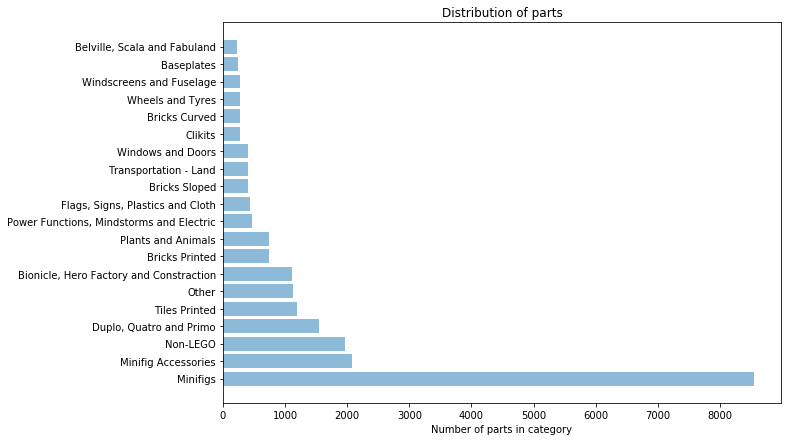

In [14]:
# Task 2 
# Plot the distribution of part categories as a (horizontal) bar chart. 
# Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).

# Count most used parts 
most_used_parts = parts.part_cat_id.value_counts().head(20)

# Join the most used parts with the part categories to get access to the part category names:
names = most_used_parts.to_frame().join(part_categories.set_index('id')).name.values

# Plotting
y_pos = np.arange(len(names))
how_many = most_used_parts.values

plt.rcParams["figure.figsize"] = [10, 7]
plt.barh(y_pos, how_many, align='center', alpha=0.5)
plt.yticks(y_pos, names)
plt.xlabel('Number of parts in category')
plt.title('Distribution of parts')

In [140]:
# Task 3
# Merge inventory_sets and inventory_parts on inventory_id
# Making sure that the quantity columns are correctly labeled (in inventory_sets the 
# quantity denotes #inventories, in inventory_parts the quantity denotes #parts)
df = inventory_sets.join(inventory_parts.set_index("inventory_id"), how="left", on="inventory_id", lsuffix="_inventories", rsuffix="_parts")
print(df.shape)
# Remove rows in which the number of parts are 0. (There are never any rows in which the quantity_inventories are 0)
df = df[df['quantity_parts'] != 0]

# Create a new column with the total quantity of parts by multiplying the quantity of inventories and the quantity
# of parts for a set
# The total quantity means the number of colors for a set.
df['total_quantity'] = df.quantity_inventories * df.quantity_parts
print(df.set_index(['set_id', 'color_id']).index.is_unique)

# sort by total quantity and remove the rows where there is a set with fewer colors (keeping the colors with 
# the highest count)
df = df.sort_values('total_quantity', ascending=False).drop_duplicates(['set_id'])

color_distribution = df.color_id.value_counts().to_frame(name = 'freq')

# join with colors to get the rgb values
color_distribution = colors.loc[:,['id','rgb', 'name']].set_index('id').join(color_distribution).dropna()

# sort cells by freq 
color_distribution = color_distribution.sort_values('freq')

(3089, 7)
False


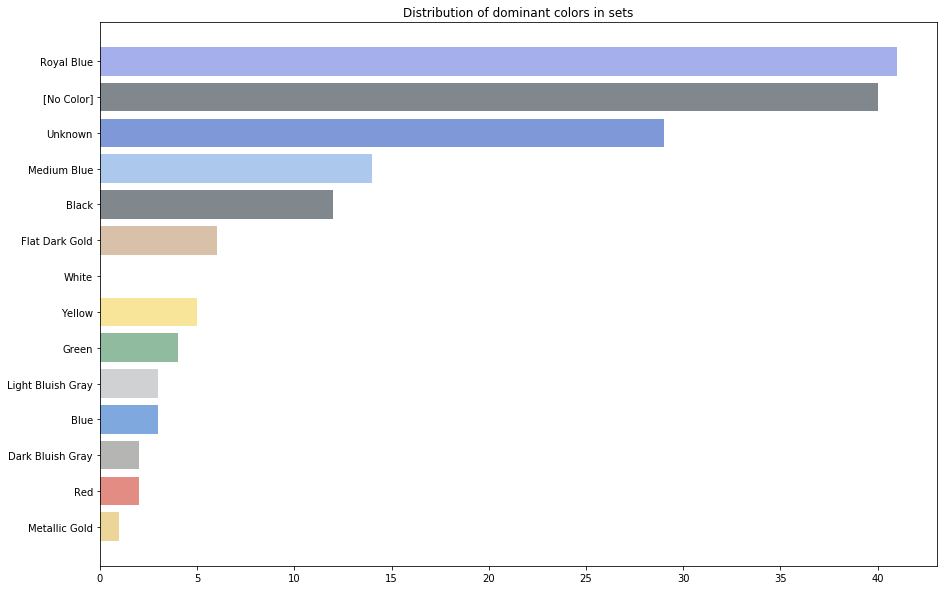

In [44]:
# plot
y = color_distribution.name
y_pos = np.arange(len(y))
x = color_distribution.freq

plt.rcParams["figure.figsize"] = [15, 10]
# Use the rgb value to pick the colors for the bars
plt.barh(y_pos, x, align='center', alpha=0.5, color = '#' + color_distribution.rgb)
plt.yticks(y_pos, y)
plt.title('Distribution of dominant colors in sets')

plt.show()

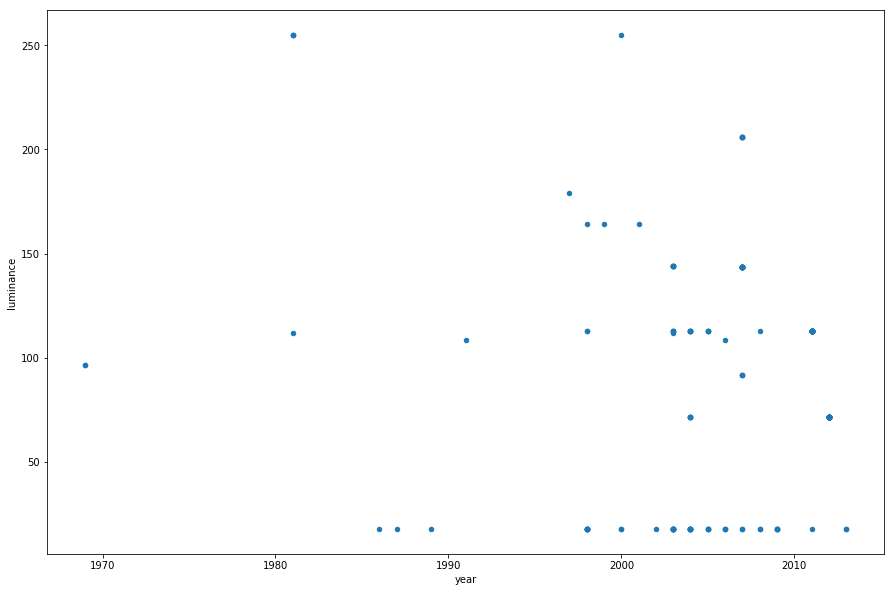

In [82]:
# Part 4 Create a scatter plot of the luminance* of the sets vs their publishing year. 
# What do you observe for the years 1980-1981? How do you interpret what you see?

# Join with colors to get the rgb values for each set
lum_df = colors.loc[:,['id','rgb', 'name']].set_index('id').join(df.set_index('color_id')).dropna()

# Join with clean sets to get the years
lum_df = lum_df.set_index('set_id').join(clean_sets.set_index('id'), lsuffix='_color', rsuffix='_set')
lum_df = lum_df.loc[:, ['rgb', 'year']]


from math import sqrt
def rgb_to_lum(x):
    R, G, B = (int(x[i:i+2], 16) for i in (0, 2, 4))
    return sqrt(0.299*(R**2) + 0.587*(G**2) + 0.114*(B**2))

# calculate the luminance based on the rgb-values
lum_df['luminance'] = lum_df['rgb'].apply(rgb_to_lum)

# Drop the years in which we have NaNs
lum_df = lum_df.dropna(subset=['year'])

# Convert the years from dftype object
lum_df['year'] = lum_df['year'].astype(str).astype(int)

lum_df.plot.scatter(x='year', y='luminance')

In [27]:
all_data = pd.merge(clean_sets, sets_dominant_color, how='left', left_on=['id'], right_on=['set_id']).dropna().loc[:,['year','color_id']]

year_color = colors.loc[:,['id','rgb']].set_index('id').join(all_data).dropna()



NameError: name 'sets_dominant_color' is not defined

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [10]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [11]:
# Write your code here
bikes = pd.read_json(BIKES_DATA_FOLDER + '/metro-bike-share-trip-data.json.zip')
df = bikes

In [95]:
bikes.head(10)


,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.23721,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.24156,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.25588,1940317,Round Trip
5,6717.0,780,2016-07-07T13:04:00,3054.0,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07T12:51:00,3021.0,34.045609,-118.23703,1944075,One Way
6,5721.0,600,2016-07-07T13:04:00,3014.0,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07T12:54:00,3022.0,34.046070,-118.23309,1944073,One Way
7,5957.0,600,2016-07-07T13:09:00,3005.0,34.048550,-118.25905,Flex Pass,365.0,2016-07-07T12:59:00,3076.0,34.040600,-118.25384,1944067,One Way
8,6137.0,2880,2016-07-07T13:49:00,3031.0,34.044701,-118.25244,Flex Pass,365.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944062,Round Trip
9,6351.0,960,2016-07-07T13:17:00,3078.0,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07T13:01:00,3031.0,34.044701,-118.25244,1944063,One Way


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [99]:
# Write your code here

# The columns 'Trip Route Category' and 'Passholder Type' are objects of string characters
# which can be mapped to categories
bikes['Trip Route Category'] = bikes['Trip Route Category'].astype('category')
bikes['Passholder Type'] = bikes['Passholder Type'].astype('category')

# For 'Passholder Type', we see that 'Plan Duration' is NaN for the category 'Staff Annual'.
# Since the name is annual, we change NaN to 365
index_staff_annual = bikes[bikes['Passholder Type'].apply(lambda x: x == 'Staff Annual')].index
bikes.loc[index_staff_annual, 'Plan Duration'] = 365

# Check if and in that case which categories have remaining NaN values
bikes[bikes['Plan Duration'].isnull()]['Passholder Type'].value_counts()

# Get index for remaining nan values in category 'Monthly Pass'
index_remaining_nan = bikes[bikes['Passholder Type'].apply(lambda x: x == 'Monthly Pass') & 
                            bikes['Plan Duration'].isnull()].index

# Only 'Monthly Pass' has NaN values, change these to 30
bikes.loc[index_eh, 'Plan Duration'] = 30

# bikes[bikes['Ending Station ID'].isna()]

# The columns which depends on other columns are 'Duration', 'Plan Duration' and 'Trip Route Category'
# sista är för att den kan beräknas med hjälp av att jämföra start och end station id

# We also can match the station to their latitude and longitude, which can save in a seperate Dataframe


In [107]:
passholder_type = bikes.loc[:,['Passholder Type','Plan Duration']].drop_duplicates(subset = 'Passholder Type')


      Passholder Type  Plan Duration
0        Monthly Pass           30.0
2           Flex Pass          365.0
4             Walk-up            0.0
55790    Staff Annual            NaN


__\* Briefly explain your approach here \*__

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

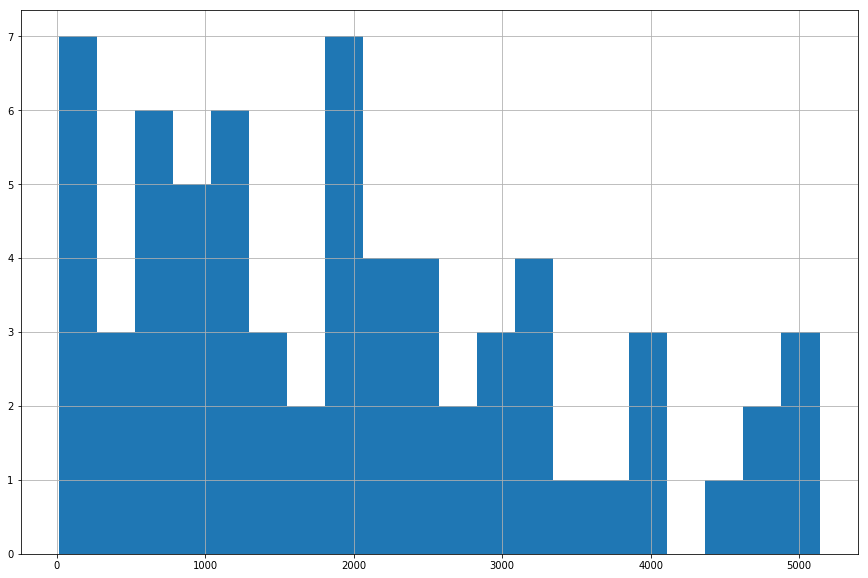

In [194]:
#Task B3.1

# Pick out the 'Starting Station ID' column and count the number of times a station has been started from.
starting_stations_count = df['Starting Station ID'].value_counts()

# Plot histogram
starting_stations_count.hist(bins=20)


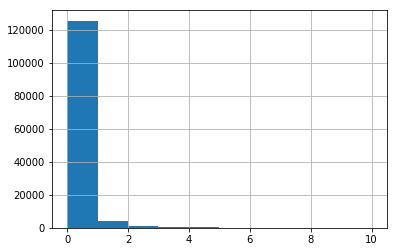

In [303]:
# Task B3.2

# Plot histograms for the duration and trip starting hour in the day attributes. 
# For both the duration and the trip starting hour use discrete 1-hour intervals. 
# What do you observe in each plot? What are some popular values in the duration plot? 
# Explain the local maxima and the trends you observe on the trip starting hour plot based on human behavior.

# Pick out duration and divide by 3660 since the durations are given in seconds.
duration = df['Duration']/3660

# Plot up to 70 hours. There are longer durations as well, but they are few, so the shape of the plot is the same.
duration.hist(bins=10, range=(0,10))

# In this plot we can see clearly that the most common amount of time to rent the bike is less than one hour.
# This makes sense, most people who use the service might be commuting to work, which for most
# people does not take more time than one hour.

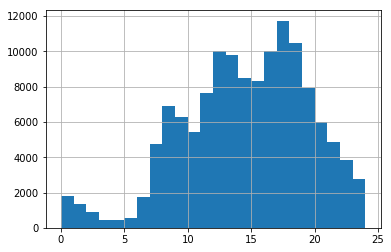

In [223]:
# Pick out Start times
trip_start = df['Start Time']

# Convert to datetime objects and pick out the hours.
trip_start = pd.to_datetime(trip_start).dt.hour

# Plot
trip_start.hist(bins = 24, range=(0, 24))

# In this graph we see that the majority of the trips start some time during the day. 
# One local maxima is at around 08h00, at time when people usually go to work.
# The global maxima is in the evening around 17-18, which correspond well with the time at which people would stop
# working and go home.


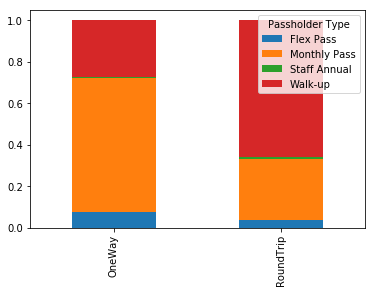

In [253]:
#Task B3.3

# For each *trip route category*, calculate the proportion of trips by 
# *passholder type* and present your results in *a stacked bar chart with normalized height*.

def trips_and_placeholder_type(df):
    """Create a dataframe with Passholder Type as the Index, and the counts of Oneway and Roundtrip for 
    the columns.
    """
    # Pick out the one way data and the round trip data separately, saving the columns for the Passholder Type
    one_way = df[df['Trip Route Category'] == "One Way"].loc[:, 'Passholder Type']
    round_trip = df[df['Trip Route Category'] == "Round Trip"].loc[:, 'Passholder Type']

    # Create new dataframe with the counts of each passholder type for one way and round trip in each column
    df2 b= pd.DataFrame(dict(OneWay = one_way.value_counts(),  RoundTrip = round_trip.value_counts()))
    df2.index.name = 'Passholder Type'
    
    return df2
    
# Calculate count for each round trip for each passholder type
df2 = prop_of_trips_passholder(df)

# Normalize columns
df2.OneWay = df2.OneWay.div(df2.OneWay.sum())
df2.RoundTrip = df2.RoundTrip.div(df2.RoundTrip.sum())

# Transpose to plot it in the direction we want.
df2.transpose().plot.bar(stacked=True);


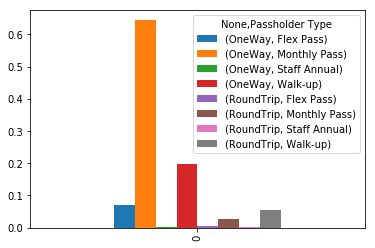

In [254]:
# Task B3.4
# Considering only trips that begin in the morning hours (before noon), 
# plot in a single bar chart the proportion of trips by passholder type and 
# trip route category. Explain any outliers you observe.

# Filter out only the trips that begin in the morning hours
trip_starting_hours = pd.to_datetime(df['Start Time']).dt.hour
df3 = df[trip_starting_hours < 12]

# Calculate count for each round trip for each passholder type
df3 = trips_and_placeholder_type(df3)

# Unstack to put them on same single bar chart
df3 = df3.unstack().to_frame()

# Normalize
df3 = df3.div(df3.sum())

# Transpose to plot it in the direction we want.
df3.transpose().plot.bar();


In [389]:
# Task B3.5
# Separate the hours of the day into two intervals that have (approximately) 
# the same number of bikes leaving the stations. For each of the two intervals 
# calculate the proportion of trips by passholder type and trip route category.
# Present your results in a DataFrame which has a unique, non-composite index. 
# Does the proportion of trips depend on whether it is the first or second hour interval? 
# Would the company have any significant benefit by creating a more complex paying scheme 
# where monthly pass users would pay less in the first interval and (equally) more on the second one? 
# Assume that the number of trips per interval will not change if the scheme changes. 

# Find the hour of the division between the two intervals

# print(trip_starting_hours.median())
# gave 14, separating into hours <=14 and >14 gives approximately the same number of bikes leaving
# (66477 for <=14 and 65950 for >14)
interval1 = df[trip_starting_hours <=14]
interval2 = df[trip_starting_hours > 14]

# Calculate count for each round trip for each passholder type
interval1 = trips_and_placeholder_type(interval1)
interval2 = trips_and_placeholder_type(interval2)

# Normalize columns
interval1 = interval1.div(interval1.sum())
interval2 = interval2.div(interval2.sum())

# Unstack to get one way and round trip on the same row
interval1 = interval1.unstack().to_frame()
interval2 = interval2.unstack().to_frame()

final_df = interval1.join(interval2, lsuffix='first', rsuffix='second')

# Structure dataframe with proper column names and create non-composite index.
final_df.columns = ['First', 'Second']
index2 = [' '.join(x) for x in qwe.index.tolist()]
final_df.index = index2

# The final dataframe.
# The four values for each type of trip route category for each interval sum up to 1
final_df

# The proportion of trips depend a bit on if it is in the first or the second hour interval.
# There is a larger percentage of monthly pass passholders in the first interval than in the 
# second interval (the percentages of One Way/Roundtrip monthly pass travelers are 65.7% and 31.4 % respectively
# for the first interval, compared to 63.8% and 27.4% for the second interval).
# The percentage of walk-up customers increase in the second interval.

# Since the amounts of rides are approximately the same in the two intervals, 
# we can conclude, by the percentages, that it would not be beneficial for the company to
# use the more complex paying scheme where monthly pass users pay less in the first interval 
# and more in the second (the inverse might be a good idea though).

,First,Second
O n e W a y F l e x P a s s,0.077116,0.073897
O n e W a y M o n t h l y P a s s,0.657161,0.638882
O n e W a y S t a f f A n n u a l,0.003055,0.001942
O n e W a y W a l k - u p,0.262668,0.285279
R o u n d T r i p F l e x P a s s,0.040729,0.034649
R o u n d T r i p M o n t h l y P a s s,0.314134,0.274778
R o u n d T r i p S t a f f A n n u a l,0.008967,0.003868
R o u n d T r i p W a l k - u p,0.636170,0.686704
